In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv


In [2]:
data = pd.read_csv(r'/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv')

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#so we are classifying the Message into either "ham" or "spam", we convert the categorical output to numerical, 
#"ham" = 0
#"spam" = 1
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Category_en = label_encoder.fit_transform(data['Category'])

In [5]:
Category_en

array([0, 0, 1, ..., 0, 0, 0])

In [6]:
message = data['Message'].to_list()
message[:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [7]:
train_size = int(len(message)*0.7)
train_size

3900

In [8]:
train_message = message[:train_size]
test_message = message[train_size:]
train_cat = Category_en[:train_size]
test_cat = Category_en[train_size:]

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
vocab_size = 1000
embedding_dim = 16
max_len = 75
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_message)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_message)
padded = pad_sequences(sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)
test_sequences = tokenizer.texts_to_sequences(test_message)
test_padded = pad_sequences(test_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

In [11]:
padded[12]

array([192,   4,  17, 193,   5, 109, 120,  52,   1,  10,  94, 495, 379,
       155,   1,  73,   6, 324, 127,   3,  37,   1, 191, 142, 156,   1,
       472,   1, 716,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 75, 16)            16000     
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                19216     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 35,233
Trainable params: 35,233
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 10
model_fit = model.fit(padded, train_cat, epochs = num_epochs, validation_data=(test_padded, test_cat))

Train on 3900 samples, validate on 1672 samples
Epoch 1/10
3900/3900 [==============================] - 1s 287us/sample - loss: 0.3324 - accuracy: 0.8600 - val_loss: 0.1986 - val_accuracy: 0.8624
Epoch 2/10
3900/3900 [==============================] - 0s 88us/sample - loss: 0.1638 - accuracy: 0.9144 - val_loss: 0.1515 - val_accuracy: 0.9719
Epoch 3/10
3900/3900 [==============================] - 0s 86us/sample - loss: 0.1331 - accuracy: 0.9772 - val_loss: 0.1320 - val_accuracy: 0.9785
Epoch 4/10
3900/3900 [==============================] - 0s 86us/sample - loss: 0.0635 - accuracy: 0.9867 - val_loss: 0.0544 - val_accuracy: 0.9850
Epoch 5/10
3900/3900 [==============================] - 0s 86us/sample - loss: 0.0325 - accuracy: 0.9913 - val_loss: 0.0489 - val_accuracy: 0.9839
Epoch 6/10
3900/3900 [==============================] - 0s 86us/sample - loss: 0.0239 - accuracy: 0.9944 - val_loss: 0.0512 - val_accuracy: 0.9839
Epoch 7/10
3900/3900 [==============================] - 0s 89us/sampl

In [14]:
#checking our predicts
classes = model.predict(test_padded)
for i in range(15):
    print(test_message[i])
    print(test_padded[i])
    print(classes[i])
    if classes[i]>0.7:
        print("It is a spam")
    else:
        print("It is not a spam")
        print("____________________________")

Ü mean it's confirmed... I tot they juz say oni... Ok then...
[ 79 645 143   1   2 845 100 616 153   1  47  58   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
[1.5885008e-06]
It is not a spam
____________________________
Okie
[658   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
[0.00168545]
It is not a spam
____________________________
That depends. How would you like to be treated? :)
[ 20   1  53 174   4  59   3  30   1   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   

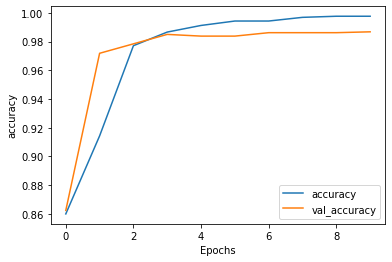

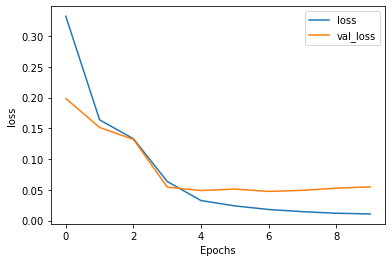

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(model_fit, "accuracy")
plot_graphs(model_fit, "loss")